In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import k3d
import datetime
from IPython.display import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

from utilis.data_generator import *
from utilis.callbacks import *
from utilis.utilis import *
from models.unet import *
from models.encoders.vgg_encoder import *

# Get data

In [2]:
def get_data(dataset_size=370,
             data_dir= "/data/cornucopia/jz522/localisation_project/DS_003_JDB-Full/coordinates_256_512/",
             val_split=0.05):
  
    data_partition = {'train': [],
                     'validation': []}

    indexes = np.arange(1,dataset_size + 1)
    np.random.shuffle(indexes)
    split_index = int(val_split*dataset_size)

    for ind in indexes[split_index:]:
        coord_npz = f"{ind:03}_rendered.png_config.npz"
        data_partition['train'].append(data_dir + coord_npz)

    for ind in indexes[:split_index]:
        coord_npz = f"{ind:03}_rendered.png_config.npz"
        data_partition['validation'].append(data_dir + coord_npz)
    
    return data_partition

In [3]:
JDB_full_dir = "/data/cornucopia/jz522/localisation_project/DS_003_JDB-Full/coordinates_256_512/"
data_partition = get_data(dataset_size=370, data_dir=JDB_full_dir)

# Write a simple model

In [ ]:
current_time = str(datetime.datetime.now()).split('.')[0]
current_time = current_time.replace(' ', '_')

experiment_dir = "/home/mlmi-2020/jz522/localisation_from_image_project/experiments/"
exp_name = "testing_tensorboard_{}".format(current_time)

### Callbacks

tensorboard

In [21]:
logdir = experiment_dir + "logs/" + exp_name
if not os.path.exists(logdir):
    os.makedirs(logdir)
    
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model_checkpoint

In [26]:
modelCheckpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath= experiment_dir + exp_name + "/model_checkpoint", 
    monitor='val_loss', 
    verbose=0, 
    save_best_only=True,
    mode='auto')

### single GPU offline data - WORKS

generator

In [22]:
generator_configs = {"batch_size": 4,
      "dim": (256,512),
      "n_channels": 3,
      "shuffle": True,
      "num_crops": 8}

training_generator = DataGenerator(data_partition['train'], **generator_configs)
validation_generator = DataGenerator(data_partition['validation'], **generator_configs)

compile model

In [23]:
compile_configs = {'metrics': [keras.metrics.MeanAbsoluteError()]}
unet_model = vgg_unet()
unet_model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.0001), **compile_configs)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 6.3484 - mean_absolute_error: 1.7582

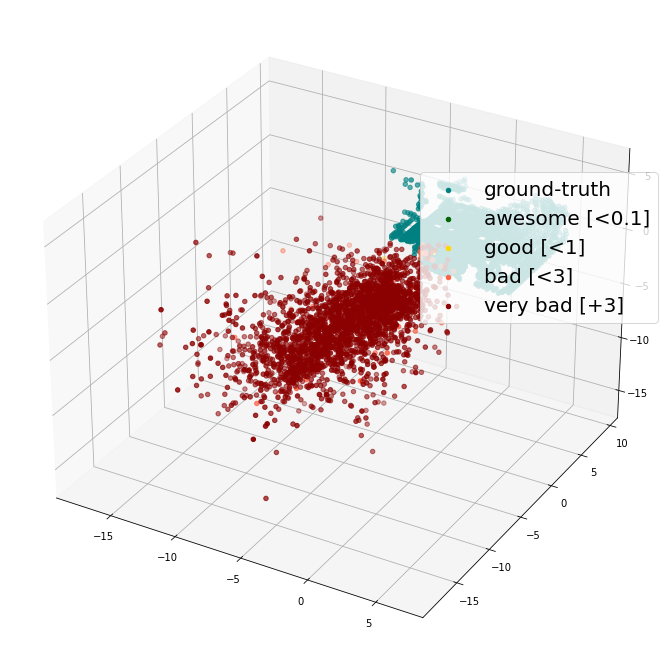

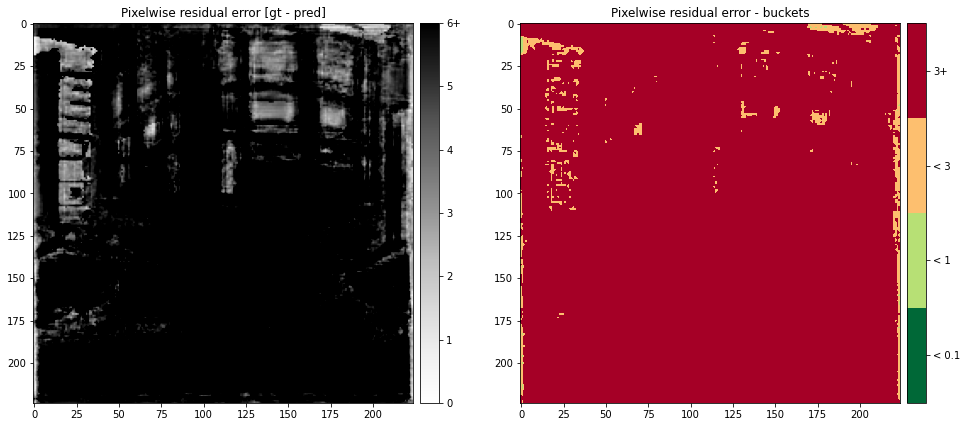

1/1 [==============================] - 2s 2s/step - loss: 6.3484 - mean_absolute_error: 1.7582
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 4.9088 - mean_absolute_error: 1.5856
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.4622 - mean_absolute_error: 1.5500
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 4.1259 - mean_absolute_error: 1.4968
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.8435 - mean_absolute_error: 1.4345
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.6422 - mean_absolute_error: 1.3805
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.4880 - mean_absolute_error: 1.3403
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.3452 - mean_absolute_error: 1.3080
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 3.2014 - mean_absolute_error: 1.2778
Epoch 10/1000
1/1 [==============

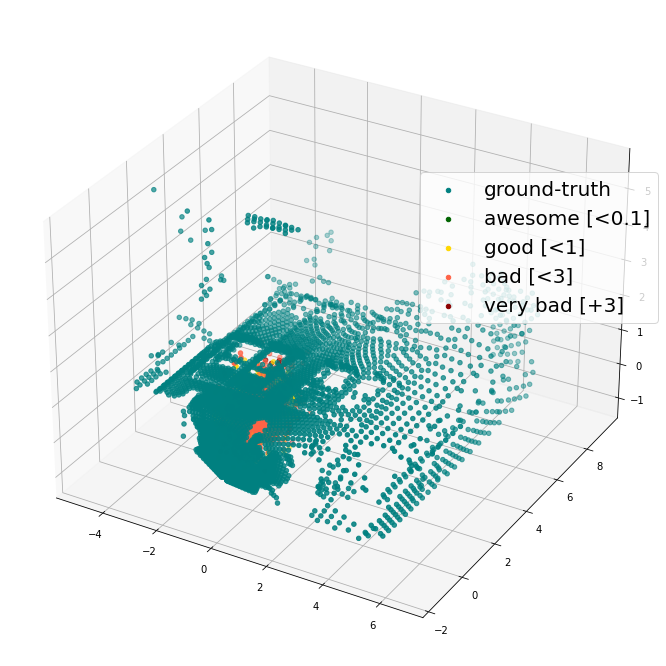

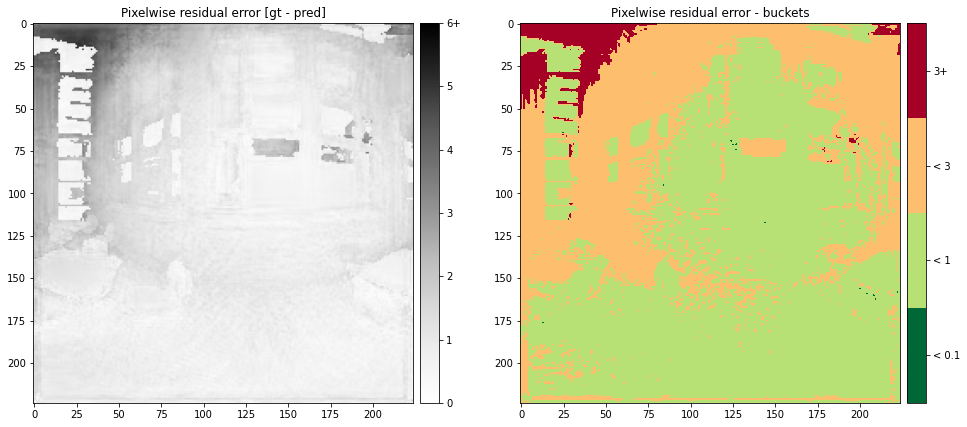

1/1 [==============================] - 2s 2s/step - loss: 0.2694 - mean_absolute_error: 0.3249
Epoch 102/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2658 - mean_absolute_error: 0.3180
Epoch 103/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2639 - mean_absolute_error: 0.3200
Epoch 104/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2631 - mean_absolute_error: 0.3172
Epoch 105/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2586 - mean_absolute_error: 0.3143
Epoch 106/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2569 - mean_absolute_error: 0.3116
Epoch 107/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2559 - mean_absolute_error: 0.3113
Epoch 108/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2548 - mean_absolute_error: 0.3117
Epoch 109/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2522 - mean_absolute_error: 0.3064
Epoch 110/1000
1/

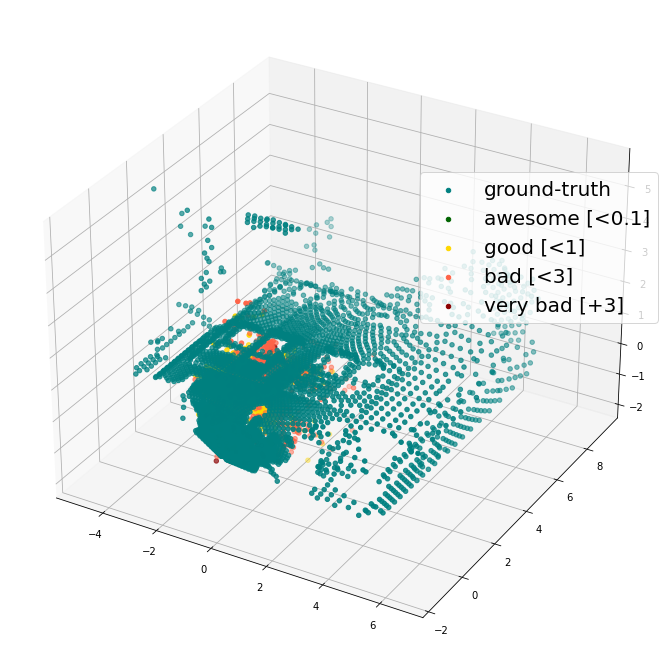

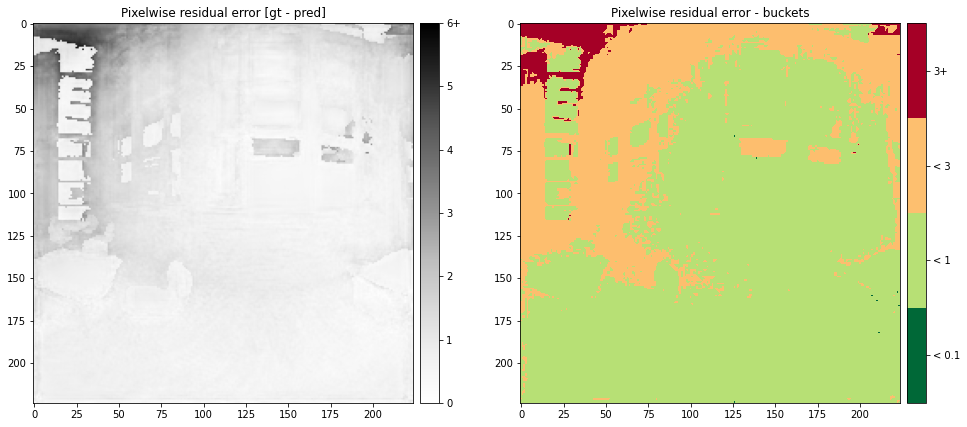

1/1 [==============================] - 2s 2s/step - loss: 0.1564 - mean_absolute_error: 0.2013
Epoch 202/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1564 - mean_absolute_error: 0.2018
Epoch 203/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1552 - mean_absolute_error: 0.1996
Epoch 204/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1543 - mean_absolute_error: 0.1985
Epoch 205/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1540 - mean_absolute_error: 0.1980
Epoch 206/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1530 - mean_absolute_error: 0.1975
Epoch 207/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1522 - mean_absolute_error: 0.1965
Epoch 208/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1518 - mean_absolute_error: 0.1958
Epoch 209/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1510 - mean_absolute_error: 0.1948
Epoch 210/1000
1/

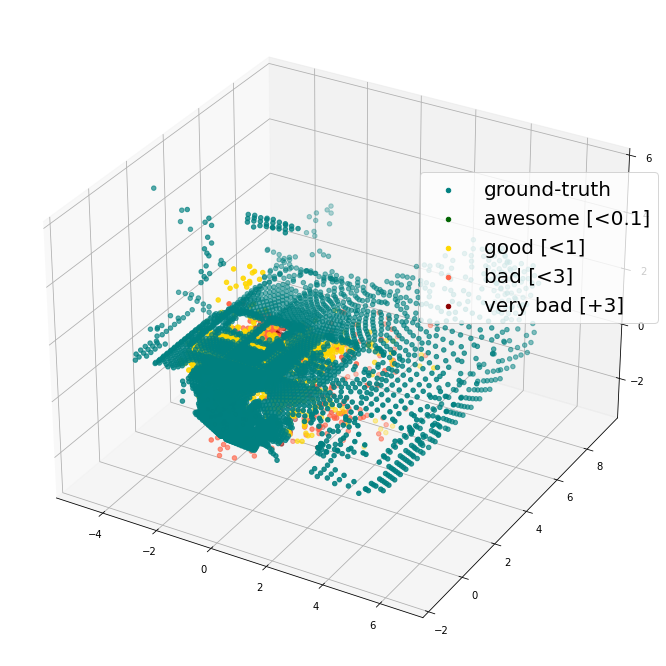

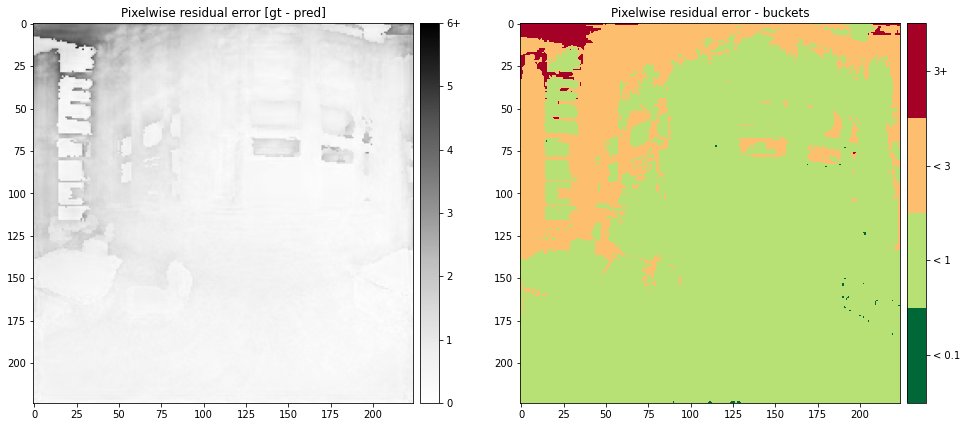

1/1 [==============================] - 2s 2s/step - loss: 0.1217 - mean_absolute_error: 0.1654
Epoch 302/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1212 - mean_absolute_error: 0.1648
Epoch 303/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1212 - mean_absolute_error: 0.1652
Epoch 304/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1208 - mean_absolute_error: 0.1643
Epoch 305/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1206 - mean_absolute_error: 0.1643
Epoch 306/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1203 - mean_absolute_error: 0.1643
Epoch 307/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1199 - mean_absolute_error: 0.1637
Epoch 308/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1194 - mean_absolute_error: 0.1627
Epoch 309/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1190 - mean_absolute_error: 0.1623
Epoch 310/1000
1/

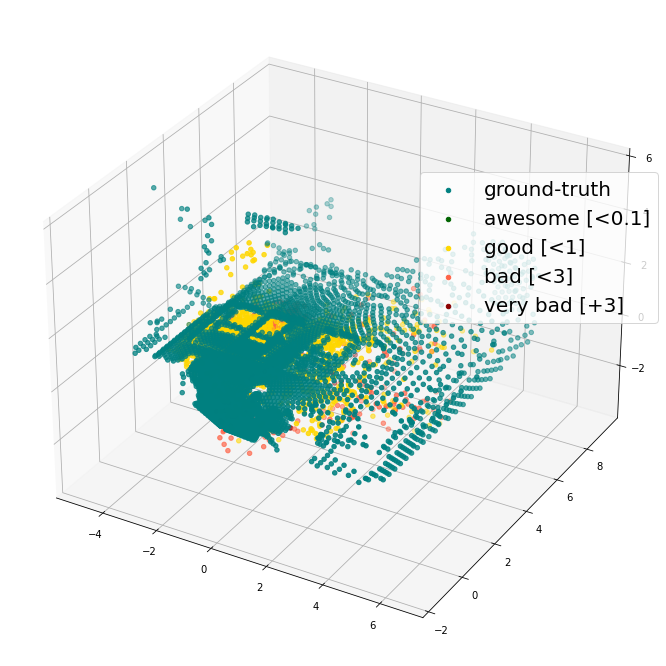

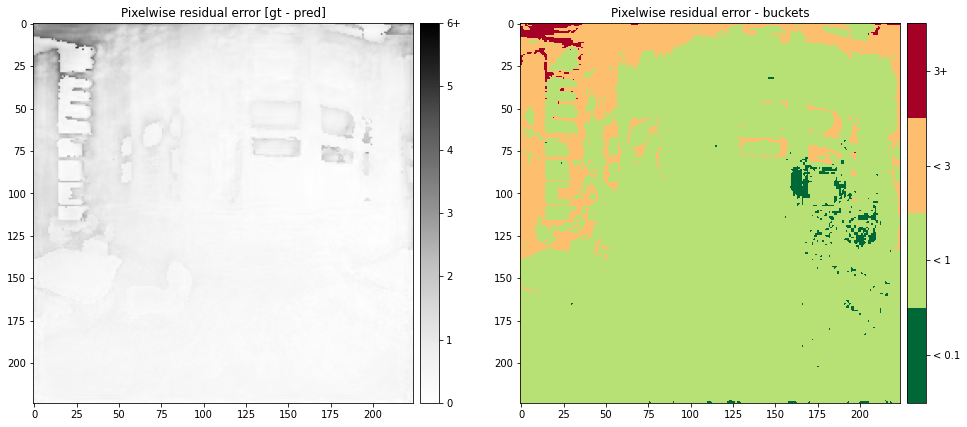

1/1 [==============================] - 2s 2s/step - loss: 0.1032 - mean_absolute_error: 0.1482
Epoch 402/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1040 - mean_absolute_error: 0.1500
Epoch 403/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1056 - mean_absolute_error: 0.1533
Epoch 404/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1074 - mean_absolute_error: 0.1571
Epoch 405/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1087 - mean_absolute_error: 0.1601
Epoch 406/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1059 - mean_absolute_error: 0.1551
Epoch 407/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1028 - mean_absolute_error: 0.1487
Epoch 408/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1041 - mean_absolute_error: 0.1513
Epoch 409/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1044 - mean_absolute_error: 0.1523
Epoch 410/1000
1/

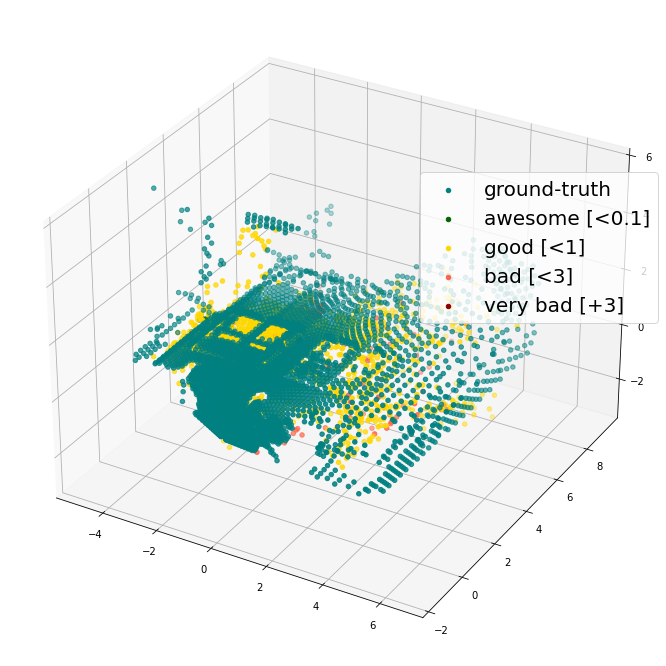

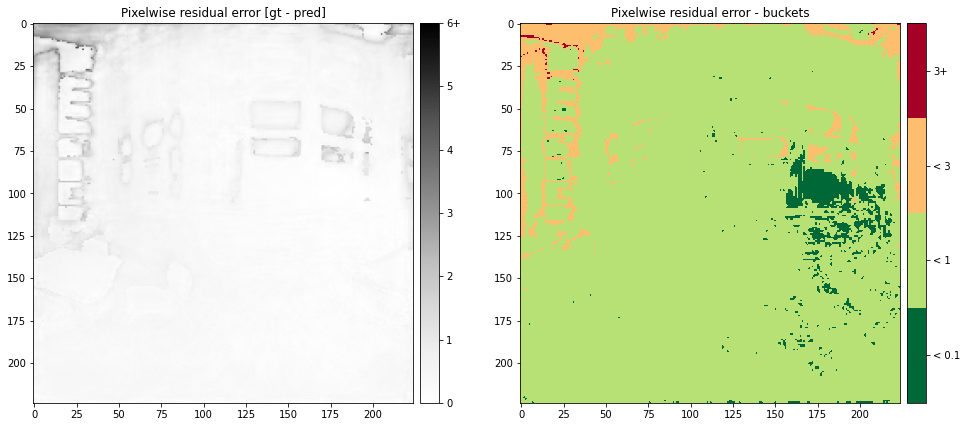

1/1 [==============================] - 2s 2s/step - loss: 0.0933 - mean_absolute_error: 0.1419
Epoch 502/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0925 - mean_absolute_error: 0.1403
Epoch 503/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0912 - mean_absolute_error: 0.1373
Epoch 504/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0922 - mean_absolute_error: 0.1400
Epoch 505/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0944 - mean_absolute_error: 0.1450
Epoch 506/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0948 - mean_absolute_error: 0.1466
Epoch 507/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0935 - mean_absolute_error: 0.1434
Epoch 508/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0931 - mean_absolute_error: 0.1426
Epoch 509/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0919 - mean_absolute_error: 0.1410
Epoch 510/1000
1/

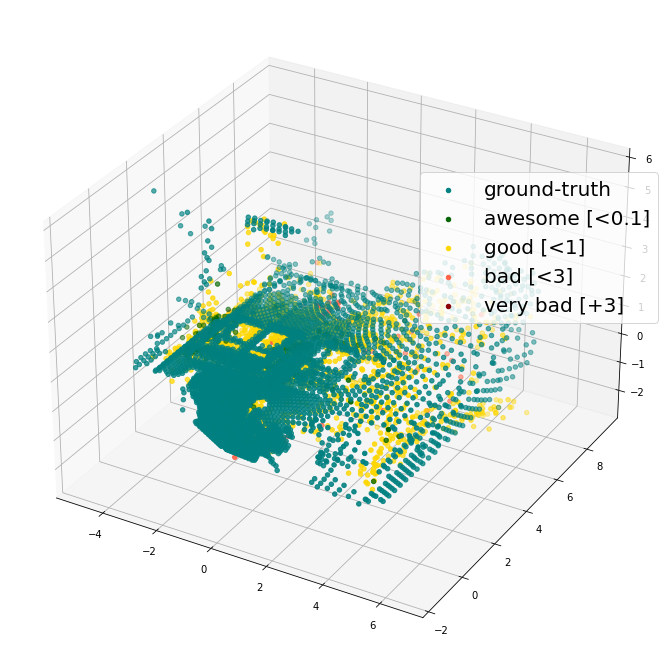

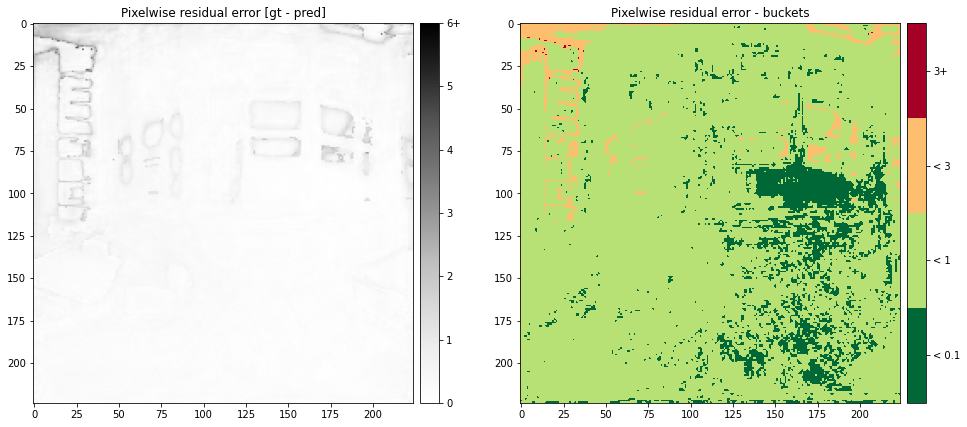

1/1 [==============================] - 2s 2s/step - loss: 0.0813 - mean_absolute_error: 0.1268
Epoch 602/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0814 - mean_absolute_error: 0.1271
Epoch 603/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0812 - mean_absolute_error: 0.1267
Epoch 604/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0814 - mean_absolute_error: 0.1274
Epoch 605/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0816 - mean_absolute_error: 0.1281
Epoch 606/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0819 - mean_absolute_error: 0.1284
Epoch 607/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0826 - mean_absolute_error: 0.1301
Epoch 608/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0831 - mean_absolute_error: 0.1316
Epoch 609/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0830 - mean_absolute_error: 0.1316
Epoch 610/1000
1/

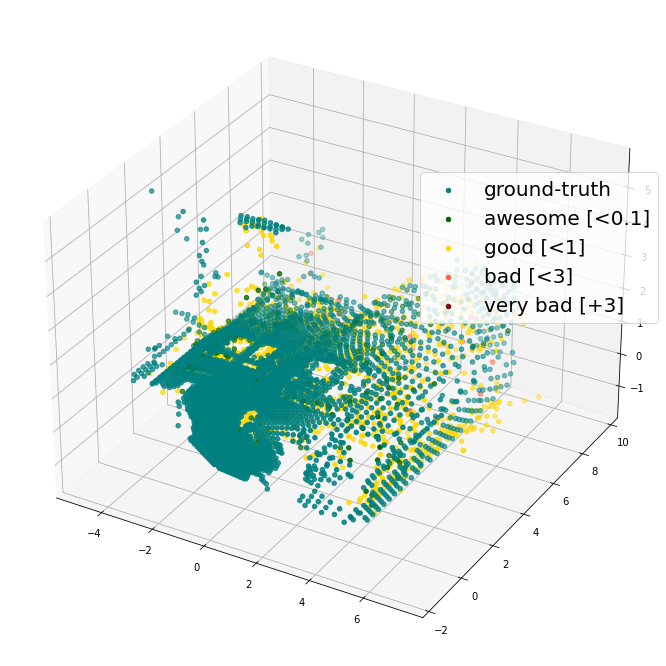

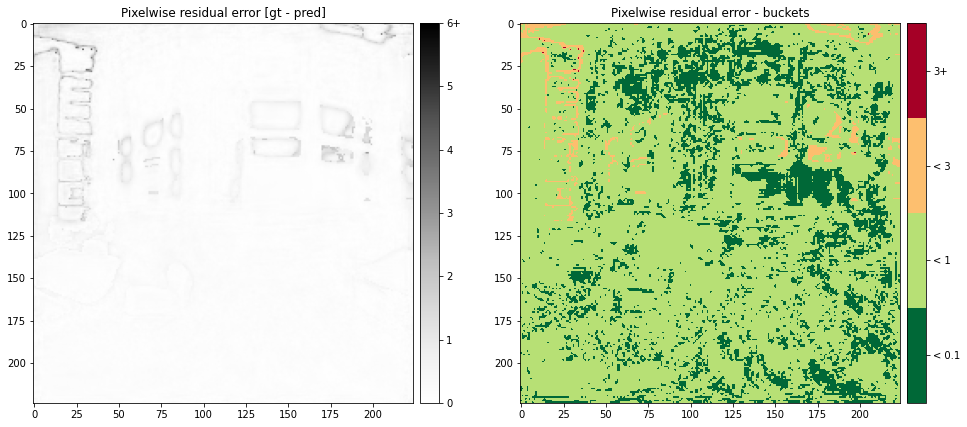

1/1 [==============================] - 2s 2s/step - loss: 0.0824 - mean_absolute_error: 0.1368
Epoch 702/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0793 - mean_absolute_error: 0.1315
Epoch 703/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0780 - mean_absolute_error: 0.1289
Epoch 704/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0801 - mean_absolute_error: 0.1337
Epoch 705/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0771 - mean_absolute_error: 0.1266
Epoch 706/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0776 - mean_absolute_error: 0.1276
Epoch 707/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0768 - mean_absolute_error: 0.1263
Epoch 708/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0759 - mean_absolute_error: 0.1238
Epoch 709/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0756 - mean_absolute_error: 0.1232
Epoch 710/1000
1/

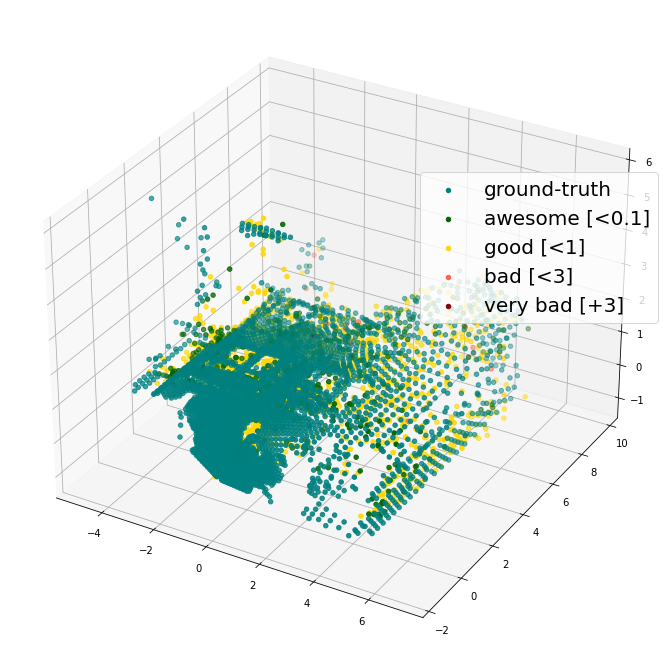

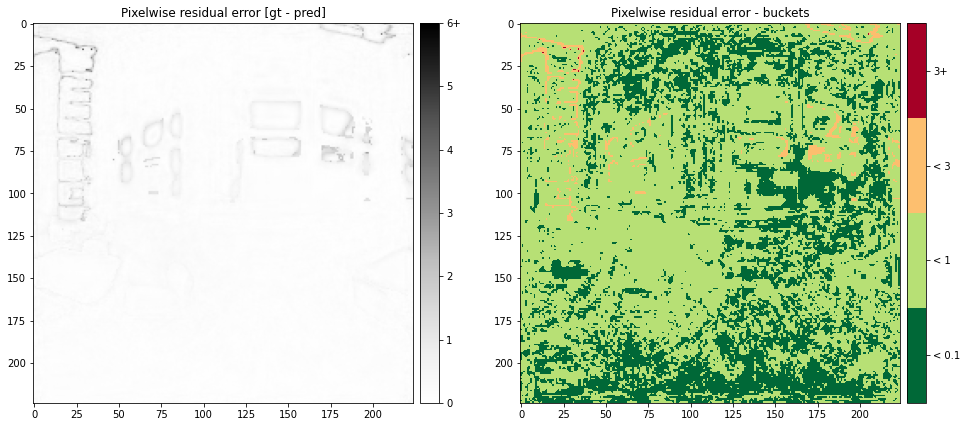

1/1 [==============================] - 2s 2s/step - loss: 0.0691 - mean_absolute_error: 0.1154
Epoch 802/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0689 - mean_absolute_error: 0.1148
Epoch 803/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0687 - mean_absolute_error: 0.1143
Epoch 804/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0685 - mean_absolute_error: 0.1141
Epoch 805/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0685 - mean_absolute_error: 0.1142
Epoch 806/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0685 - mean_absolute_error: 0.1144
Epoch 807/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0685 - mean_absolute_error: 0.1143
Epoch 808/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0683 - mean_absolute_error: 0.1140
Epoch 809/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0682 - mean_absolute_error: 0.1138
Epoch 810/1000
1/

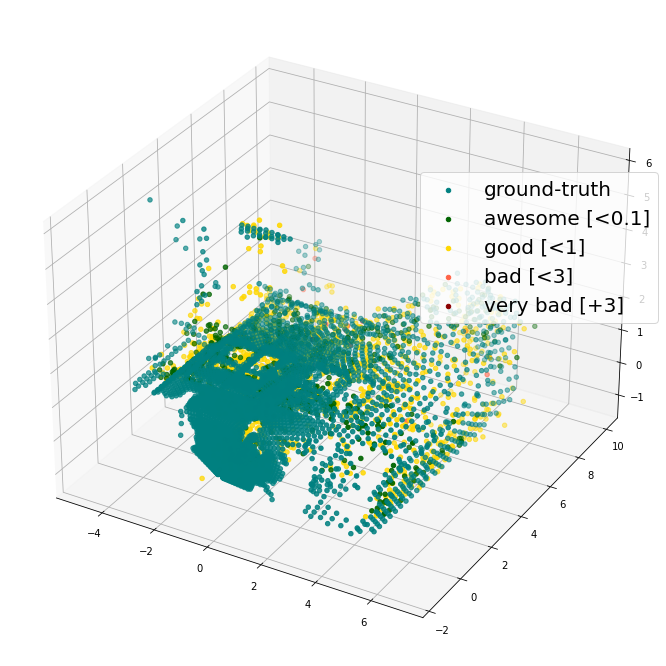

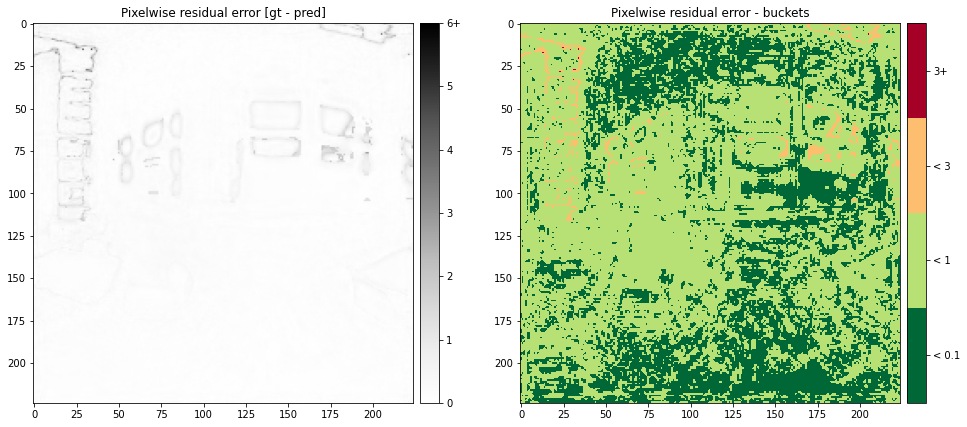

1/1 [==============================] - 2s 2s/step - loss: 0.0655 - mean_absolute_error: 0.1146
Epoch 902/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0653 - mean_absolute_error: 0.1141
Epoch 903/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0656 - mean_absolute_error: 0.1148
Epoch 904/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0653 - mean_absolute_error: 0.1141
Epoch 905/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0650 - mean_absolute_error: 0.1133
Epoch 906/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0645 - mean_absolute_error: 0.1122
Epoch 907/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0642 - mean_absolute_error: 0.1113
Epoch 908/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0643 - mean_absolute_error: 0.1116
Epoch 909/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0641 - mean_absolute_error: 0.1114
Epoch 910/1000
1/

In [25]:
images, labels = training_generator.__getitem__(0)

visualise_training = Visualise_learning(images[0], labels[0], 100, exp_name, "train")

unet_model.fit(x=images, y=labels, epochs=1000, verbose=1, 
               callbacks=[visualise_training,
                          tensorboard_callback,
                          modelCheckpoint_callback])

### single GPU with generator - WORKS

In [6]:
# compile_configs = {'metrics': [keras.metrics.MeanAbsoluteError()]}

# unet_model = vgg_unet()
# unet_model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.0001), **compile_configs)

In [7]:
# exp_name = "generator_test"
# visualise_training = Visualise_learning(images[0], labels[0], 10, exp_name)

unet_model.fit(x=training_generator, validation_data=validation_generator, epochs=10, verbose=1, 
               callbacks=[visualise_training,
                          tensorboard_callback,
                          modelCheckpoint_callback])

In [17]:
my_dict = {'tool': "lol"}
my_dict2 = {'tool2': "lol2"}
method_(**my_dict, **my_dict2)

lol
lol2


In [16]:
def method_(
                    **kwargs):
    print(kwargs['tool'])
    print(kwargs['tool2'])

### multiple GPUs - WORKS

In [27]:
strategy = tf.distribute.MirroredStrategy(['/device:GPU:0', '/device:GPU:3', '/device:GPU:4', '/device:GPU:2'])
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

with strategy.scope():
    
    compile_configs = {'metrics': [keras.metrics.MeanAbsoluteError()]}
                     
    generator_configs = {"batch_size": 4,
          "dim": (256,512),
          "n_channels": 3,
          "shuffle": True,
          "num_crops": 8}

    training_generator = DataGenerator(data_partition['train'], **generator_configs)
    validation_generator = DataGenerator(data_partition['validation'], **generator_configs)
    
    images_train, labels_train = training_generator.__getitem__(0)
    images_val, labels_val = validation_generator.__getitem__(0)
    
    fit_configs = {'callbacks': [RemoveGarbageCallback(),
                           Visualise_learning(images_train[0], labels_train[0], 1, exp_name, "train"),
                            Visualise_learning(images_val[0], labels_val[0], 1, exp_name, "val"),
                                 tensorboard_callback,
                                 modelCheckpoint_callback
                            ],
               'epochs': 2,
               'verbose': 1}
    
    unet_model = vgg_unet()
    unet_model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.0001), **compile_configs)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:2')
Number of devices: 4


Epoch 1/2
INFO:tensorflow:batch_all_reduce: 46 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 46 all-reduces with algorithm = nccl, num_packs = 1
74/74 [==============================] - ETA: 0s - loss: 2.7615 - mean_absolute_error: 1.0998

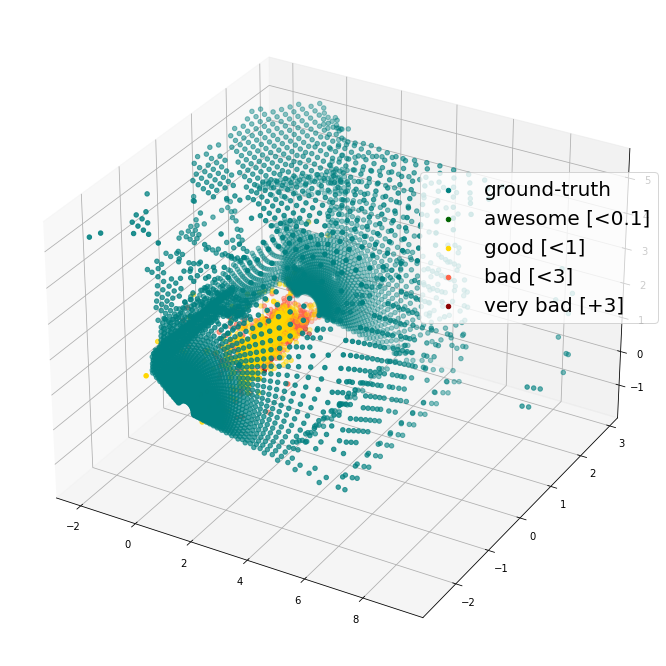

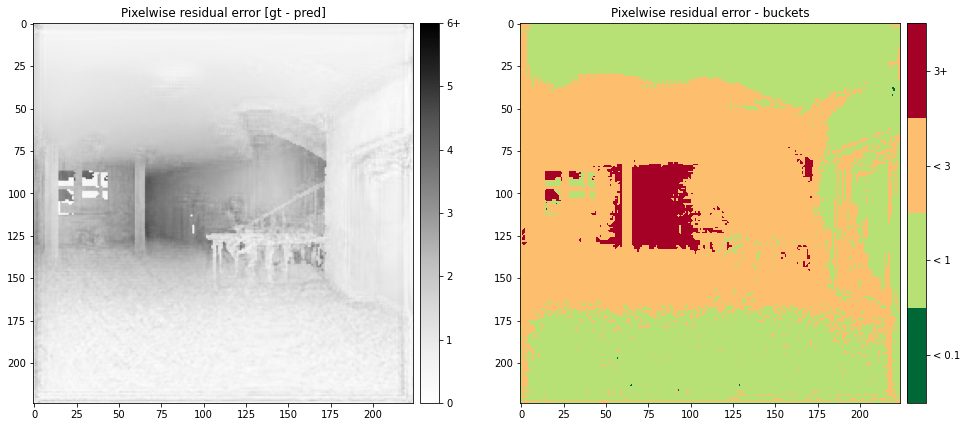

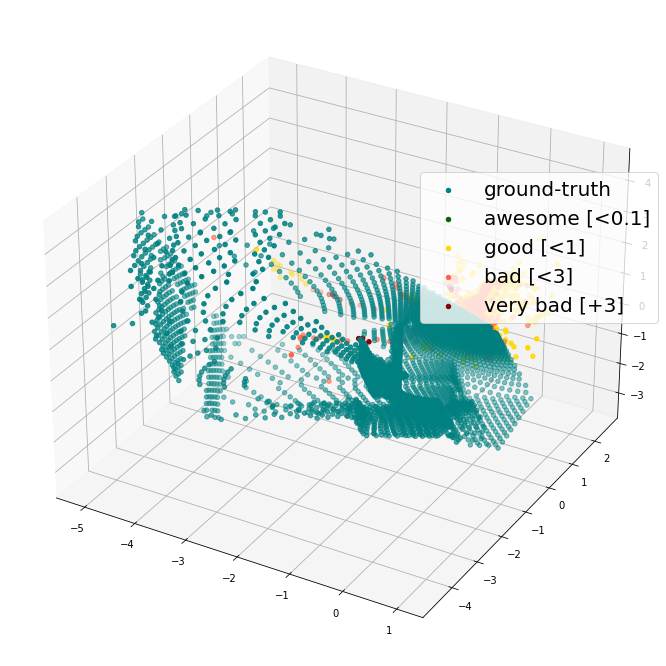

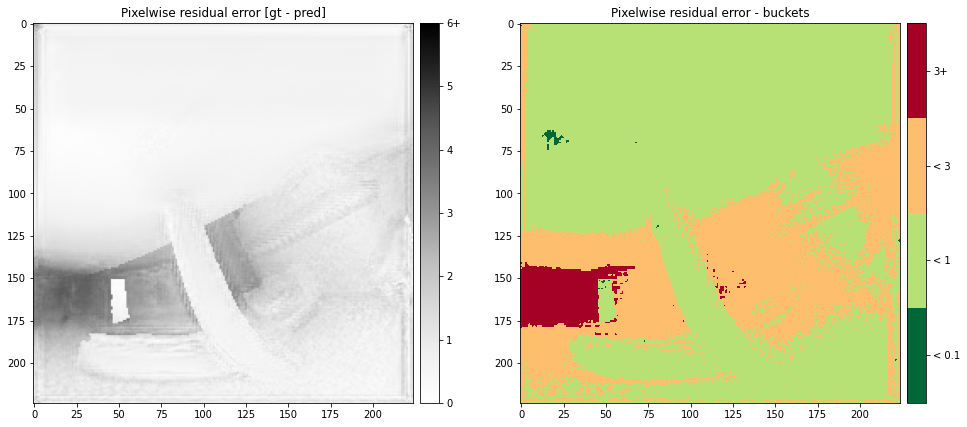

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /home/mlmi-2020/jz522/localisation_from_image_project/experiments/testing_tensorboard_1618394964.0276635/model_checkpoint/assets
74/74 [==============================] - 35s 474ms/step - loss: 2.7615 - mean_absolute_error: 1.0998 - val_loss: 2.5569 - val_mean_absolute_error: 1.1082
Epoch 2/2
74/74 [==============================] - ETA: 0s - loss: 2.3895 - mean_absolute_error: 0.9917

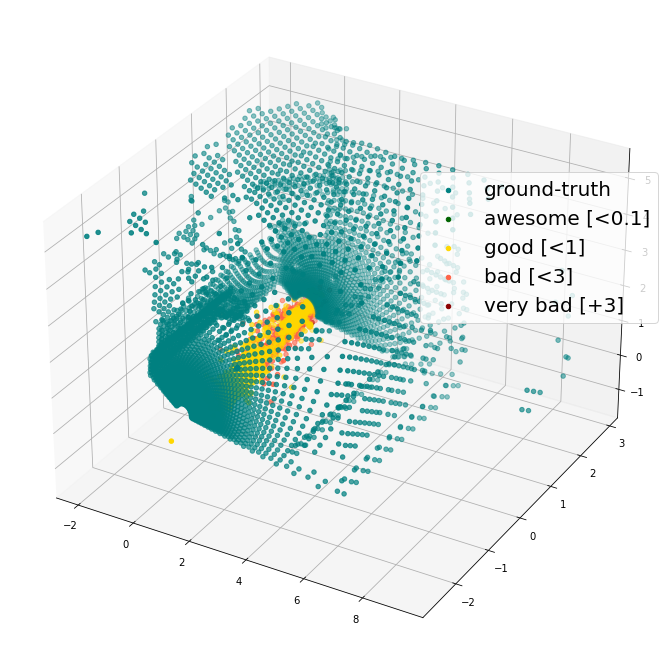

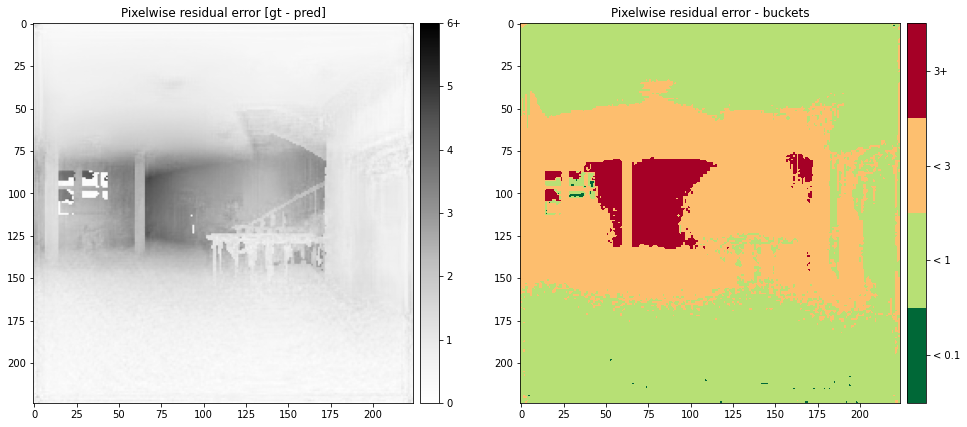

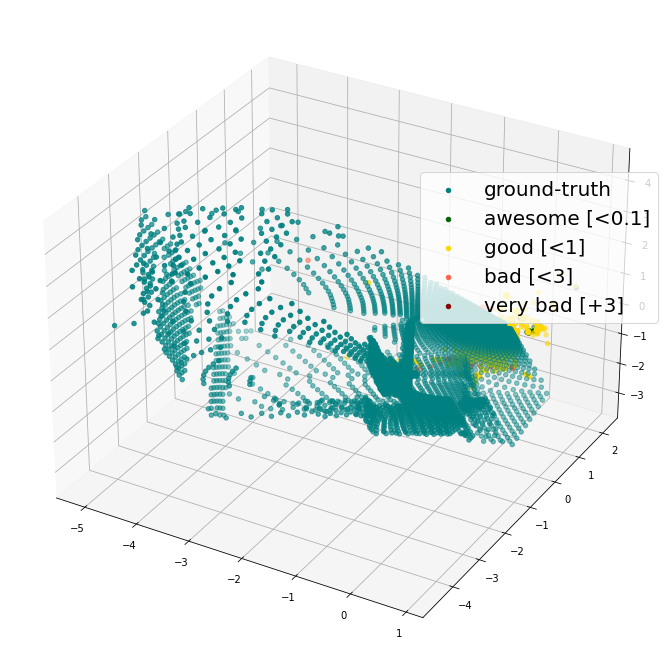

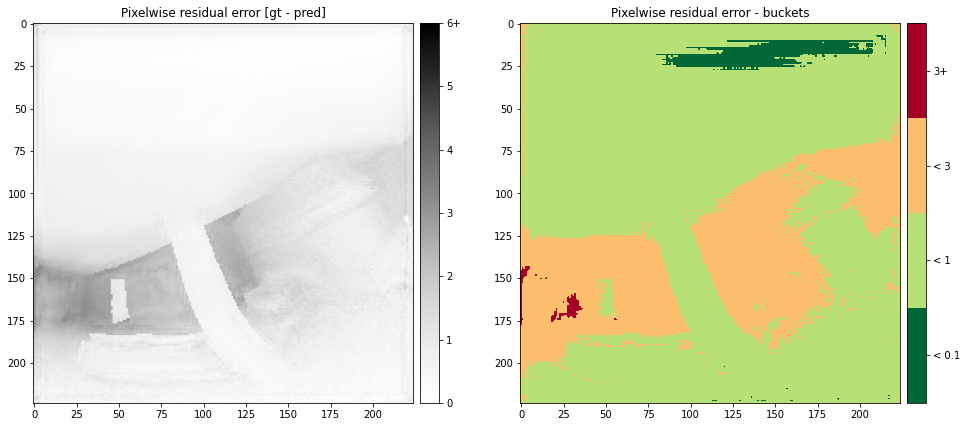

INFO:tensorflow:Assets written to: /home/mlmi-2020/jz522/localisation_from_image_project/experiments/testing_tensorboard_1618394964.0276635/model_checkpoint/assets
74/74 [==============================] - 28s 381ms/step - loss: 2.3895 - mean_absolute_error: 0.9917 - val_loss: 2.2481 - val_mean_absolute_error: 0.9767


In [28]:
unet_model.fit(x=training_generator, validation_data=validation_generator, **fit_configs)

In [11]:
# from keras import backend as K
# K.clear_session()

In [12]:
# from numba import cuda
# cuda.select_device(0)
# cuda.close()

In [ ]:
# croped_img, croped_lbl

In [31]:
import time
start_time = time.time()
unet_model.fit(x=images, y=labels, epochs=10, verbose=1) #, callbacks=[visualise_training])
print("--- %s seconds ---" % (time.time() - start_time))


Epoch 1/10
1/1 [==============================] - 0s 44ms/step - loss: 0.9915 - mean_absolute_error: 0.7207
Epoch 2/10
1/1 [==============================] - 0s 43ms/step - loss: 0.8785 - mean_absolute_error: 0.6878
Epoch 3/10
1/1 [==============================] - 0s 42ms/step - loss: 0.7978 - mean_absolute_error: 0.6654
Epoch 4/10
1/1 [==============================] - 0s 38ms/step - loss: 0.7545 - mean_absolute_error: 0.6519
Epoch 5/10
1/1 [==============================] - 0s 41ms/step - loss: 0.7215 - mean_absolute_error: 0.6386
Epoch 6/10
1/1 [==============================] - 0s 39ms/step - loss: 0.6837 - mean_absolute_error: 0.6219
Epoch 7/10
1/1 [==============================] - 0s 39ms/step - loss: 0.6481 - mean_absolute_error: 0.6057
Epoch 8/10
1/1 [==============================] - 0s 38ms/step - loss: 0.6195 - mean_absolute_error: 0.5941
Epoch 9/10
1/1 [==============================] - 0s 40ms/step - loss: 0.5934 - mean_absolute_error: 0.5823
Epoch 10/10
1/1 [===========

In [146]:
images[0:1].shape

(1, 224, 224, 3)

In [14]:
pred_y = unet_model.predict(images[0:1])

NameError: name 'images' is not defined

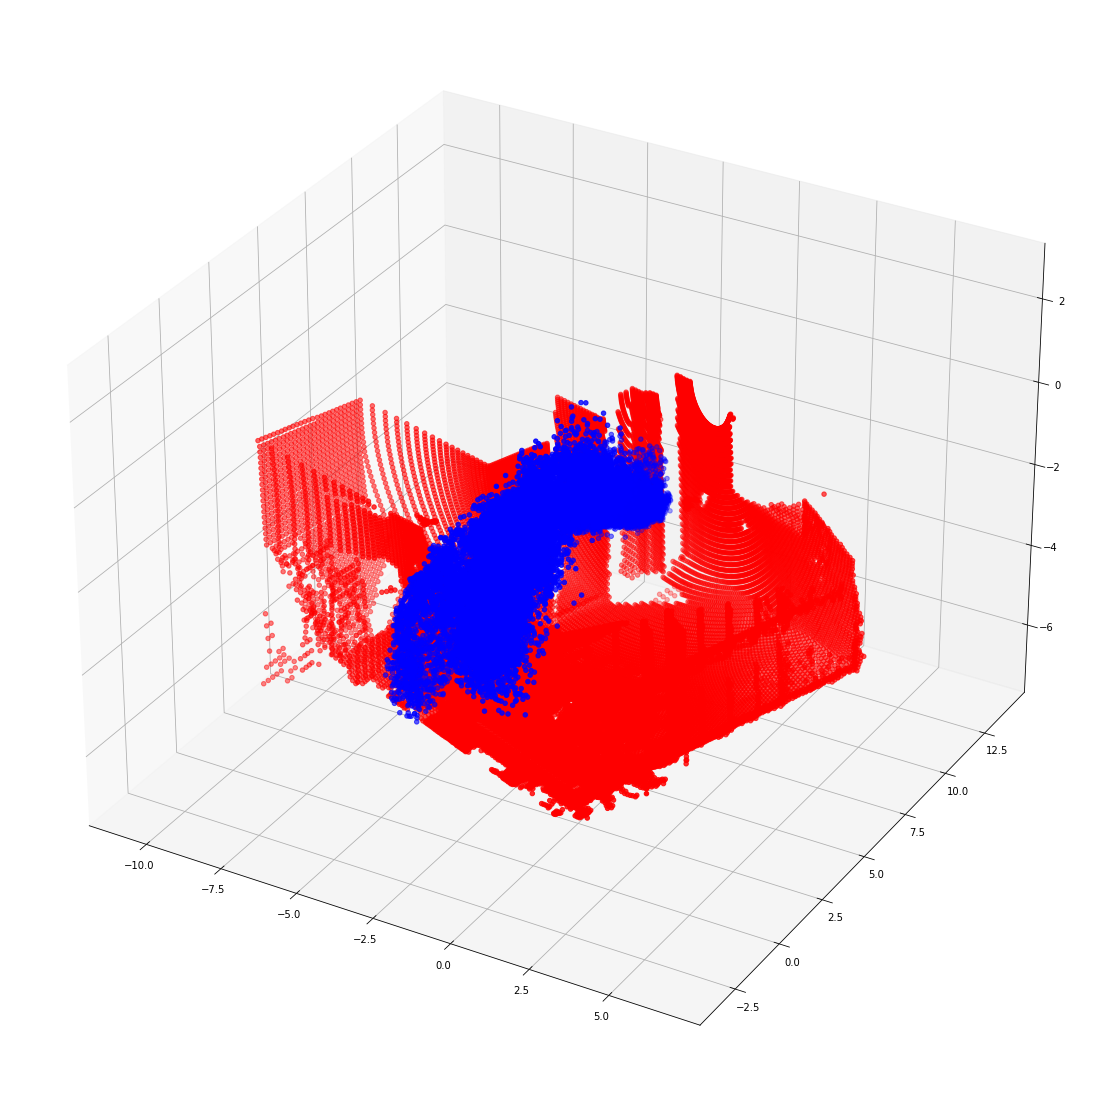

In [149]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

xyz = labels[0,:,:,:].reshape(-1, labels[0,:,:,:].shape[-1])
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='r', marker='o')

xyz = pred_y[0,:,:,:].reshape(-1, pred_y[0,:,:,:].shape[-1])
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='b', marker='o')

In [92]:
plot = k3d.plot(name='points')
plt_points = k3d.points(positions=labels_low[2], point_size=0.2, color=0xff0000, alpha=0.5)
plot += plt_points
plt_points = k3d.points(positions=pred_y[2], point_size=0.2, color=0x0000ff, alpha=0.5)
plot += plt_points
plt_points.shader='3d'
plot.display()

Output()

In [93]:
plot.fetch_screenshot()

In [94]:
with open('screenshot.png', 'wb') as f:
#     try:
#         out = plot.screenshot.decode('base64')
#     except: # Python 3
    from base64 import b64decode
    out = b64decode(plot.screenshot)    
    f.write(out)
    
Image(url='screenshot.png')

In [82]:
plot.screenshot

''

In [75]:
image_dir = plot.screenshot
img = mpimg.imread(image_dir)
plt.imshow(img)

AttributeError: 'str' object has no attribute 'read'

TypeError: Image data of dtype <U1 cannot be converted to float

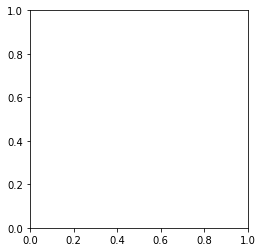

In [69]:
plt.imshow(plot.screenshot)